In [1]:
#Ignas Kunickas MMT 4k.


In [20]:
#DNN

In [2]:
import os
import time
from datetime import datetime
import numpy as np
import pandas as pd
from tensorflow.keras.callbacks import TensorBoard

In [3]:
# %load_ext tensorboard

In [3]:
import tensorflow.keras as keras
from tensorflow.keras.layers import Dense, Input, Flatten, Conv2D, BatchNormalization, Activation, Dropout, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, SGD

In [4]:
cwd = os.getcwd() #parodo kas content folderyje
print(cwd)
os.listdir(os.getcwd())

/notebooks


['storage',
 'datasets',
 'Untitled.ipynb',
 '.ipynb_checkpoints',
 'Untitled Folder',
 'Flatland_IK.ipynb',
 'flatland_train.data',
 'model.CNN.h5',
 'logs',
 'core']

In [5]:
import gzip
import pickle

X,y = pickle.load(gzip.open('flatland_train.data','rb'))
y[y != 0] -= 2
X = X.reshape(X.shape[0], 50, 50, 1) / 255.0
#X = X / 255 #su DNN


In [8]:
#PVZ modelio, nukopinu nuo destytojo
NAME = "DNN".format(int(time.time()))
#print(NAME)
model = keras.models.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=[50, 50, 1]))  #cia yra is CNN paskaitos, atkreipk demesi, vietoj 28 yra 50
model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'))                           # nes paveiksliuko dydis 50x50 
model.add(Flatten()) 

model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(5, activation="softmax")) #cia 5, nes turim 5 figuros

model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])
model.summary()



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 48, 48, 32)        320       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 46, 46, 32)        9248      
_________________________________________________________________
flatten_1 (Flatten)          (None, 67712)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               6771300   
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 505       
Total params: 6,781,373
Trainable params: 6,781,373
Non-trainable params: 0
_________________________________________________________________


In [13]:
tensorboard = TensorBoard(log_dir="logs/{}".format(NAME))
loss = model.fit(X, y, epochs=10, validation_split=0.1, callbacks=tensorboard)  #treniruojam

Epoch 1/10
282/282 [==============================] - 20s 73ms/step - loss: 0.1340 - accuracy: 0.9608 - val_loss: 0.4660 - val_accuracy: 0.8400
Epoch 2/10
282/282 [==============================] - 21s 76ms/step - loss: 0.0226 - accuracy: 0.9934 - val_loss: 0.5941 - val_accuracy: 0.8300
Epoch 3/10
282/282 [==============================] - 19s 66ms/step - loss: 0.0059 - accuracy: 0.9991 - val_loss: 0.6472 - val_accuracy: 0.8420
Epoch 4/10
282/282 [==============================] - 19s 66ms/step - loss: 0.0015 - accuracy: 0.9999 - val_loss: 0.6671 - val_accuracy: 0.8420
Epoch 5/10
282/282 [==============================] - 19s 66ms/step - loss: 4.1253e-04 - accuracy: 1.0000 - val_loss: 0.7002 - val_accuracy: 0.8420
Epoch 6/10
282/282 [==============================] - 21s 73ms/step - loss: 2.6899e-04 - accuracy: 1.0000 - val_loss: 0.7267 - val_accuracy: 0.8420
Epoch 7/10
282/282 [==============================] - 19s 66ms/step - loss: 1.9452e-04 - accuracy: 1.0000 - val_loss: 0.7505 - v

In [58]:
model.save('model.CNN.h5') 

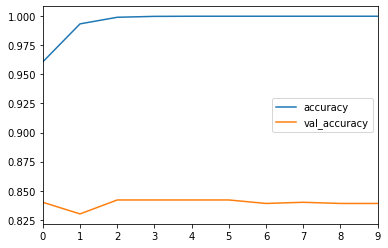

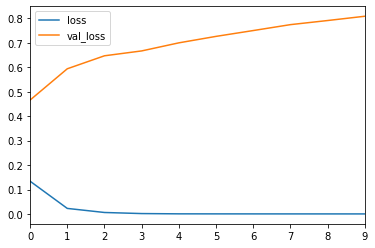

In [14]:
pd.DataFrame(loss.history)[['accuracy', 'val_accuracy']].plot()
 # nestabilumas loss kreiveje kaltinit arba learning rate arba pati data seta
                            
# imant leanring_rate 0.02 matosi bangavima
pd.DataFrame(loss.history)[['loss', 'val_loss']].plot() # loss isryskina paklaidas kurios yra treniruojamos

In [15]:
#from google.colab import files
#files.download('model.h5') 
pred = model.predict(X).argmax(axis=1)
print('Accuracy on test set - {0:.02%}'.format((pred == y).mean()))

Accuracy on test set - 98.39%


In [ ]:
#sita paleidi ir turi rodyt koks tikslumas ant train set'o
def evaluate(path, model):
    X, y = pickle.load(gzip.open(path, 'rb'))
    y[y != 0] -= 2
    X = X / 255.
    acc = np.mean(model(X).numpy().argmax(axis=1) == y)
    return acc

model = keras.models.load_model('model.CNN.h5')
evaluate('flatland_train.data', model)

In [ ]:
#Adam?